In [2]:
# imports
import torch
from torch import nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
import torchvision
import time
import os

In [3]:
# We use this function for plotting later.
def plot_linear_regression(x_data,y_data,ws,bs,losses,plot_line_every=20):
    fig, [ax1,ax2,ax3] = plt.subplots(1,3,figsize=(15, 4))
    ax1.scatter(x_data,y_data,c='r',s=5)
    ax1.set_xlabel("x")
    ax1.set_ylabel('y')
    ax2.set_xlabel('w')
    ax2.set_ylabel("b")
    ax3.set_xlabel('step')
    ax3.set_ylabel('loss')

    ax1.scatter(x_data,y_data,c='r',s=5, label='data')
    ax1.set_xlabel("x")
    ax1.set_ylabel('y')

    min_x, max_x = min(x_data), max(x_data)

    if ws is not None and bs is not None:
        for step in np.arange(0,len(ws),plot_line_every):
            w, b = ws[step], bs[step]
            ax1.plot(np.linspace(min_x,max_x,10), w*np.linspace(min_x,max_x,10)+b, label=step)
        ax1.legend(title="epoch")
        ax2.scatter(ws, bs, s=3, c = np.arange(len(ws)), cmap='viridis')
        ax2.grid(True)
    ax3.plot(losses)

# PyTorch Tensors
PyTorch is an open-source machine learning library developed by Facebook's AI Research lab. It provides a flexible and dynamic computational graph system that allows for easy experimentation with neural networks and deep learning models. PyTorch is known for its simplicity, ease of use, and flexibility, making it a popular choice among researchers and developers in the field of artificial intelligence. It also offers support for GPU acceleration, distributed computing, and a rich ecosystem of tools and libraries for building and training machine learning models.


PyTorch tensors are the fundamental data structure used for building and training neural networks within the PyTorch framework. Similar to arrays or matrices, tensors are multi-dimensional arrays that can represent scalar values, vectors, matrices, or even higher-dimensional data. Tensors in PyTorch are highly efficient for numerical computations and are designed to work seamlessly with GPU acceleration, enabling faster training of deep learning models. They also support automatic differentiation, a key feature for implementing various optimization algorithms in neural network training. PyTorch tensors offer a wide range of operations for manipulating and transforming data, making them essential for building sophisticated machine learning models.

We can only scratch the surface of tensors here. You can learn more from the PyTorch documentation.

**Contents**
- Tensor instantiation
- Operations, matrix-vector multiplication, broadcasting
- GPU vs CPU

In [4]:
# A torch tensor is a multi-dimensional matrix containing elements of a single data type.
x = torch.tensor([1.0,2.0])
y = torch.tensor([3.0,2.0])
A = torch.tensor([[3.0,4.0],
                  [0.0,1.0]])

In [5]:
# Tensors have a lot of built-in functionality.
print(f"Mean of x: {x.mean()}")
print(f"Cholesky decomposition of A:\n{torch.linalg.cholesky(A)}")

Mean of x: 1.5
Cholesky decomposition of A:
tensor([[1.7321, 0.0000],
        [0.0000, 1.0000]])


In [6]:
# Torch implements mathematical and logical operations over tensors. These operations are done elementwise.
print(f"x + y: {x + y}")
print(f"x * y: {x * y}")
print(f"x == y: {x == y}")

x + y: tensor([4., 4.])
x * y: tensor([3., 4.])
x == y: tensor([False,  True])


In [7]:
# Careful, when tensors are not of the same dimension, they may be broadcasted (repeated along a dimension, as in numpy).
# Be aware of that, since this can lead to your code running but not doing what you want.
print(f"A + x:\n{A + x}\n-> Elementwise addition of every row of A with x.")
print(f"A * x:\n{A * x}\n-> Elementwise multiplication of every row of A with x.")
# For matrix vector multiplication, we can use torch.matmul.
print(f"torch.matmul(A,x): {torch.matmul(A,x)} -> Matrix vector product of A and x.")
# Matmul can behave differently for different dimensions of its arguments.
print(f"torch.matmul(y,x): {torch.matmul(x,y)} -> Dot product product of x and y.")

A + x:
tensor([[4., 6.],
        [1., 3.]])
-> Elementwise addition of every row of A with x.
A * x:
tensor([[3., 8.],
        [0., 2.]])
-> Elementwise multiplication of every row of A with x.
torch.matmul(A,x): tensor([11.,  2.]) -> Matrix vector product of A and x.
torch.matmul(y,x): 7.0 -> Dot product product of x and y.


In [7]:
## Main
# So far we could've used numpy. Torch implements a CPU and a GPU version of tensors.
y_gpu = torch.tensor([3,4], device='cuda' if torch.cuda.is_available() else 'cpu')
# To use any tensor operations, all tensors need to be on the same device.
# You can send tensors to another device, using the .to("[cpu|cuda]") command.
# (Make sure that you have selected a GPU runtime in Colab.)
res = x + y_gpu
print(res)

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu!

**Tasks**:
1. Solve the GPU issue in the last cell.
2. Write and plot a simple 2D linear function y = A*x+b for multiple values of x with one line (no loops) using PyTorch. The vectors x are here stacked to a matrix X.

**Solution:**

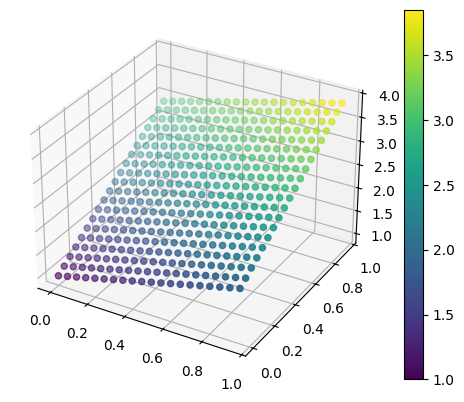

In [8]:
## Main
# Task 2.
X = torch.tensor([[x,y] for x in range(20) for y in range(20)])/20.
A = torch.tensor([1.,2.])
b = torch.tensor(1.)

y = torch.matmul(A, X.T) + b
y = torch.sum(A*X, dim = 1) + b # Your code here (hint: you can do this using broadcasting or matrix-matrix multiplication; Transposing a matrix is done with A.T).

fig, ax = plt.subplots(subplot_kw={'projection': '3d'})
s = ax.scatter(X[:,0], X[:,1], y, c=y, cmap='viridis')
fig.colorbar(s)

# Autograd
Autograd is a key feature of PyTorch that automatically computes gradients for tensors. It enables automatic differentiation, which is essential for training neural networks using techniques like backpropagation. With autograd, PyTorch keeps track of operations performed on tensors and dynamically builds a computational graph to calculate gradients efficiently. This allows users to easily compute gradients without having to manually derive and implement complex mathematical formulas, making it easier to train deep learning models and optimize their parameters effectively.

**Contents:**
- Compute gradients in leaf nodes
- Automatic differentiation graph


In [9]:
# We can create gradients of our operations with PyTorch's autograd. We can tell PyTorch if we need
# gradients of leaf nodes. Gradients are automatically computed for all operations.
w = torch.tensor([3.],requires_grad=False)
b = torch.tensor([2.],requires_grad=False)
x = torch.tensor([1.],requires_grad=True) # PyTorch will automatically track the gradients w.r.t. x.
y = w * x + b
print(f"y = {y}")

# Using .backward(), we can compute the gradients from a node of the computation graph.
# We can then get the gradient of a tensor. d/dx(3*x+2) = 3
y.backward()
print(f"dy/dx = {x.grad}")

# When saving values, e.g., for plotting, we usually do not want to save the full tensor,
# including the autograd tree. We therefore usually put them on the cpu (.cpu()), detach them from
# the autograd tree (.detach()), and copy them to a numpy array (.numpy()).
print(f"y.cpu().detach().numpy(): {y.cpu().detach().numpy()}")

# For single values we can also use .item().
print(f'y.item(): {y.item()}')

y = tensor([5.], grad_fn=<AddBackward0>)
dy/dx = tensor([3.])
y.cpu().detach().numpy(): [5.]
y.item(): 5.0


**Tasks**:
1. Try to compute dy/dw. You can use w.requires_grad_() as inplace operation to make PyTorch track gradients w.r.t. w. You will have to recompute y to build the graph.
2. Plot d(sin(x))/dx from 0 to 2*pi using autograd (you can use loops).

**Solution**:

In [10]:
# Solution 1:

w.requires_grad_()
y = w*x + b
y.backward()
print(f"dy/dw = {w.grad}")

dy/dw = tensor([1.])


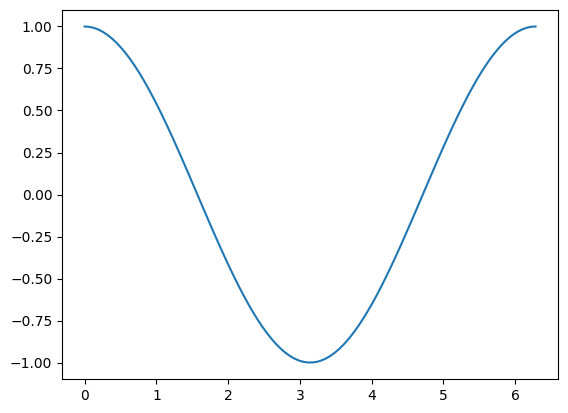

In [11]:
# Solution 2:

## Main
# Task 2.
X = torch.linspace(0,2*torch.pi,100)
grads = []
#### Your Code here ####
for x in X:
  x_grad = x.requires_grad_()
  y = torch.sin(x)
  y.backward()
  grads.append(x.grad.detach().numpy())
fig, ax = plt.subplots()
ax.plot(X, grads)

Text(0, 0.5, 'y')

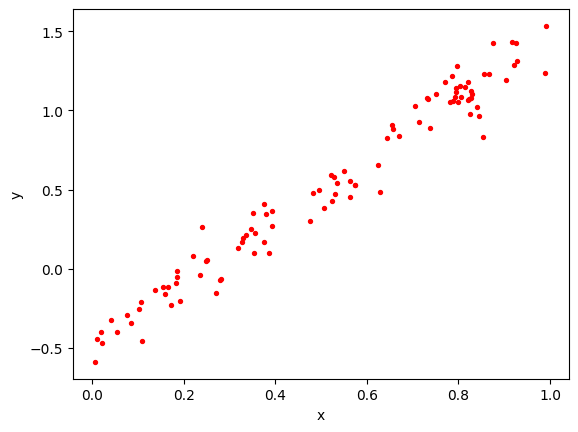

In [12]:
# We use a very simple dataset of linear data corrupted by noise.
x_data = torch.rand((100,1), requires_grad=False)
y_data = 2 * x_data + -0.5 + 0.1 * torch.randn_like(x_data)

# Plot the data.
fig, ax = plt.subplots()
ax.scatter(x_data,y_data,c='r',s=8)
ax.set_xlabel("x")
ax.set_ylabel('y')

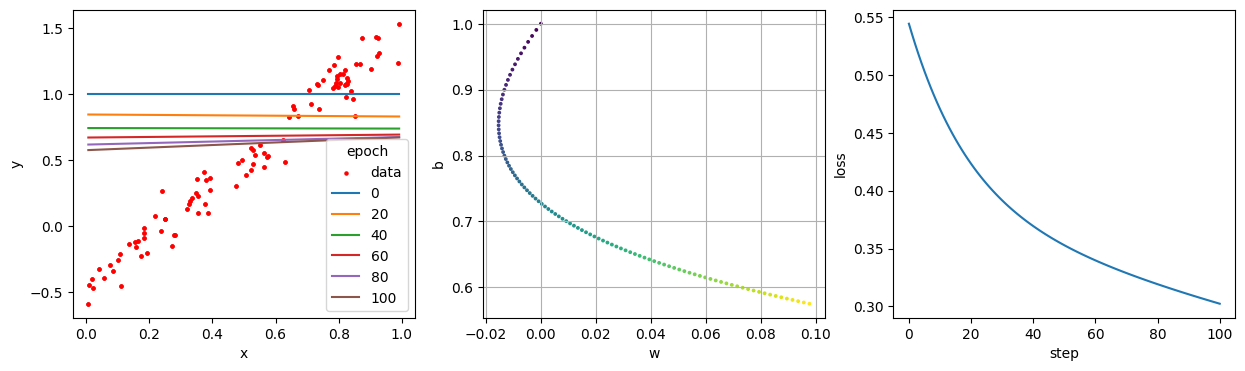

In [13]:
## Main
# We will learn the two parameters w and b. We need gradients for them.
w = torch.tensor(0., requires_grad=True)
b = torch.tensor(1., requires_grad=True)

# We will plot those variables and the loss over time.
ws = []
bs = []
losses = []

# Hyperparameters.
lr = 0.01
epochs = 101

# Optimization loop.
for step in range(epochs):
    # The forward pass of the network.
    y_predicted = w*x_data+b
    # We use MSE as our loss function.
    loss = torch.square(y_data-y_predicted).mean()
    # Compute the gradients.
    loss.backward()
    # Reporting values
    losses.append(loss.item())
    ws.append(w.item())
    bs.append(b.item())
    with torch.no_grad():
        # Apply a step of gradient descent.
        w -= w.grad * lr
        b -= b.grad * lr
        # We here reset the gradients for the next step of gradient descent.
        w.grad.zero_()
        b.grad.zero_()
# This plots the data with the linear function at different steps, the two parameters w and b over epochs, and the loss over epochs.
plot_linear_regression(x_data, y_data, ws, bs, losses)

**Tasks**
1. Play around with different learning rates and number of iterations. What behavior can you see for high learning rates? Can you set it too high?
2. Try out a different loss function, for example the absolute error. What changes?

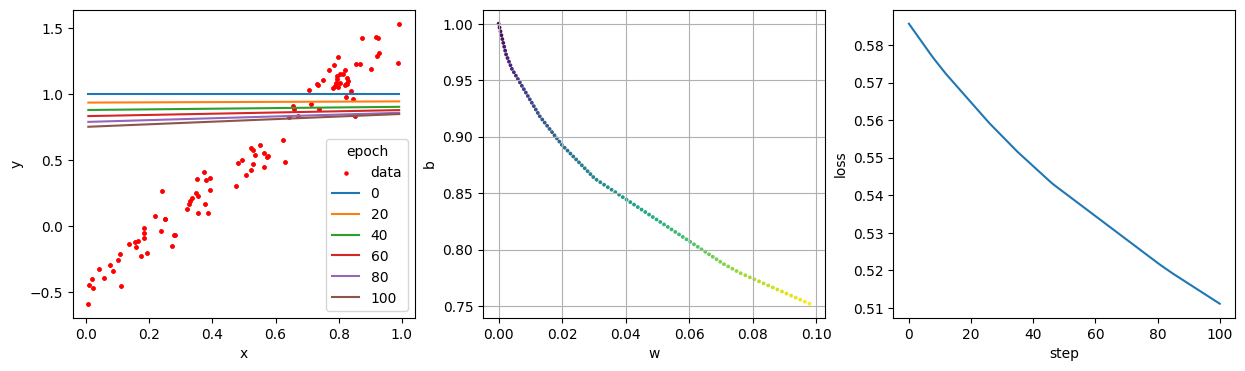

In [14]:
## Main
# We will learn the two parameters w and b. We need gradients for them.
w = torch.tensor(0., requires_grad=True)
b = torch.tensor(1., requires_grad=True)

# We will plot those variables and the loss over time.
ws = []
bs = []
losses = []

# Hyperparameters.
lr = 0.01
epochs = 101

# Optimization loop.
for step in range(epochs):
    # The forward pass of the network.
    y_predicted = w*x_data+b
    # We use MSE as our loss function.
    loss = torch.absolute(y_data-y_predicted).mean()
    # Compute the gradients.
    loss.backward()
    # Reporting values
    losses.append(loss.item())
    ws.append(w.item())
    bs.append(b.item())
    with torch.no_grad():
        # Apply a step of gradient descent.
        w -= w.grad * lr
        b -= b.grad * lr
        # We here reset the gradients for the next step of gradient descent.
        w.grad.zero_()
        b.grad.zero_()
# This plots the data with the linear function at different steps, the two parameters w and b over epochs, and the loss over epochs.
plot_linear_regression(x_data, y_data, ws, bs, losses)

## nn.Module

Defining a forward function, computing a loss and gradients using autograd, and updating parameters according to this gradient is used in all of Deep Learning. PyTorch therefore implements functionality so that you do not have to code this all by yourself.

In [15]:
# We usually use the nn.Module class to define models. We have to implement a forward function that computes the forward pass of our model.
# We here use a linear module of PyTorch (nn.Linear). This can have an arbitrary number of in- and outputs. For one in and one output,
# we have the same model as we have used before.
class LinearModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        pred = self.linear(x)
        return pred

LinearModel(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)


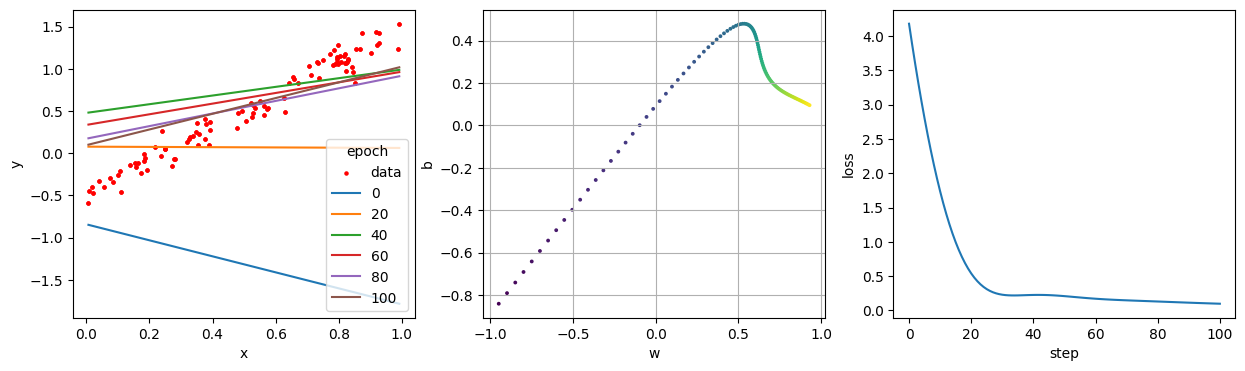

In [16]:
# Hyperparameters.
lr = 0.05
epochs = 101

# Instantiate our model. This is the same model that we have coded ourselves before.
model = LinearModel()
# We use an optimizer so we do not have to take care of updating the parameters ourselves.
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
# PyTorch implements all kinds of loss functions you may want to use.
mse = torch.nn.MSELoss()
# We can print a model summary, indeed it is the same simple linear model as before.
print(model)

# We will plot some variables and the loss over time.
ws = []
bs = []
losses = []

# Training Loop.
for step in range(epochs):
    # Compute the forward pass.
    y_predicted = model(x_data)
    # Compute the loss.
    loss = mse(y_data, y_predicted)
    # Reset and then compute gradients of the tree.
    optimizer.zero_grad()
    loss.backward()
    # Variables for plotting.
    ws.append(model.linear.weight[0][0].item())
    bs.append(model.linear.bias[0].item())
    losses.append(loss.detach().numpy())
    # Updating the parameters.
    optimizer.step()
# Plot the results.
plot_linear_regression(x_data, y_data, ws, bs, losses)

**Tasks:**
1. Change the data to y = sin(x) + noise on the interval from 0 to 2pi. How does the model perform on this data?
2. Try to add more linear layers to the model. What happens with the loss? Why?

In [17]:
# Solution
x_data = torch.rand((100,1), requires_grad = False)*2*torch.pi
y_data = torch.sin(x_data) + 0.2*torch.randn_like(x_data)

LinearModel(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)


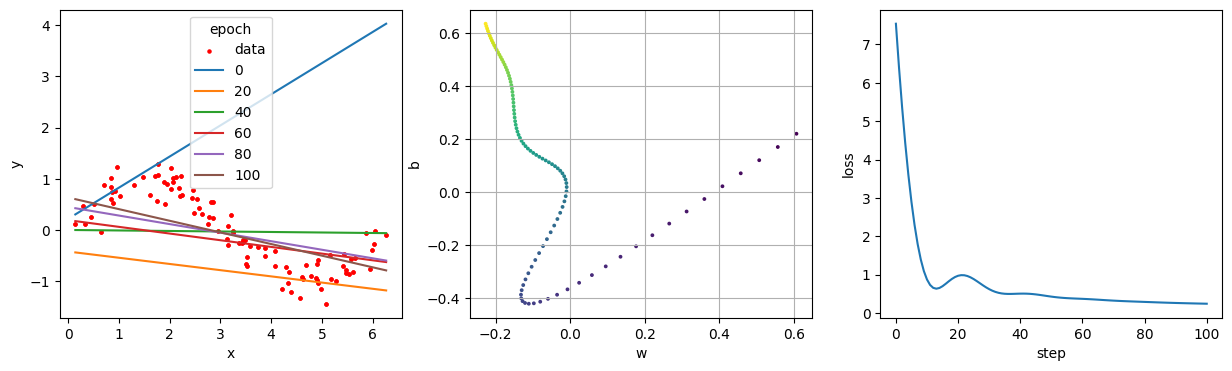

In [18]:
# Hyperparameters.
lr = 0.05
epochs = 101

# Instantiate our model. This is the same model that we have coded ourselves before.
model = LinearModel()
# We use an optimizer so we do not have to take care of updating the parameters ourselves.
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
# PyTorch implements all kinds of loss functions you may want to use.
mse = torch.nn.MSELoss()
# We can print a model summary, indeed it is the same simple linear model as before.
print(model)

# We will plot some variables and the loss over time.
ws = []
bs = []
losses = []

# Training Loop.
for step in range(epochs):
    # Compute the forward pass.
    y_predicted = model(x_data)
    # Compute the loss.
    loss = mse(y_data, y_predicted)
    # Reset and then compute gradients of the tree.
    optimizer.zero_grad()
    loss.backward()
    # Variables for plotting.
    ws.append(model.linear.weight[0][0].item())
    bs.append(model.linear.bias[0].item())
    losses.append(loss.detach().numpy())
    # Updating the parameters.
    optimizer.step()
# Plot the results.
plot_linear_regression(x_data, y_data, ws, bs, losses)

**Data Change:** The data is set to y = sin(x) + noise on [0, 2π], with Gaussian noise (std=0.2).

**Model Performance:** A single linear layer performs poorly, yielding a high MSE loss (~0.5–1.0) because it can only fit a straight line to the nonlinear sin(x).

**Adding Linear Layers:** Adding more linear layers without nonlinearities doesn’t improve the loss (~0.5–1.0 remains). This happens because stacked linear layers still produce a linear function, incapable of capturing sin(x)’s oscillations.

**Solution:** Adding nonlinear activations (e.g., ReLU) between layers allows the model to fit sin(x), reducing the loss significantly (~0.05–0.1), limited mainly by noise.

# Neural Networks
Neural networks are computational models composed of interconnected nodes, or neurons, organized into layers. These networks learn and perform various tasks such as classification, regression, and pattern recognition through a process known as training, where the connections between neurons' weights are adjusted to optimize performance. With advancements in deep learning, neural networks with multiple hidden layers, known as deep neural networks, have shown remarkable success across diverse domains such as image and speech recognition, natural language processing, and autonomous driving. Their ability to learn complex patterns from large datasets has made them a cornerstone of modern artificial intelligence research and applications.

**Content:**
- Feed Forward Neural Networks (nn.Linear and Nonlinearities)
- Overfitting and Underfitting
- Train, test, validation split
- Checkpointing (saving and loading models to/from disk)
- Classification: MNIST

In [19]:
# We first keep on working with a simple 2d dataset that is a sin + noise.
x_data = torch.rand((100,1), requires_grad=False)*2*torch.pi
y_data = torch.sin(x_data) + 0.2 * torch.randn_like(x_data)

In [20]:
# We split our dataset into train, validation and test set.
idxs = torch.randperm(len(x_data))
train_idxs, val_idxs, test_idxs = idxs[:50], idxs[50:80], idxs[80:]
max_train_idx = int(0.5*len(x_data))
x_train, y_train = x_data[train_idxs], y_data[train_idxs]
x_val, y_val = x_data[val_idxs], y_data[val_idxs]
x_test, y_test = x_data[test_idxs], y_data[test_idxs]

In [21]:
# We use a simple neural network with one hidden layer and the relu nonlinearity.
class FeedForwardNN(nn.Module):
    def __init__(self, hidden_dim=100) -> None:
        super().__init__()
        self.input = nn.Linear(1, hidden_dim)
        self.hidden1 = nn.Linear(hidden_dim, hidden_dim)
        self.output = nn.Linear(hidden_dim,1)

    def forward(self, x):
        x = self.input(x)
        x = F.relu(x)
        x = self.hidden1(x)
        x = F.relu(x)
        out = self.output(x)
        return out

FeedForwardNN(
  (input): Linear(in_features=1, out_features=100, bias=True)
  (hidden1): Linear(in_features=100, out_features=100, bias=True)
  (output): Linear(in_features=100, out_features=1, bias=True)
)
Training the neural network...
Training finished. Elapsed time: 30.48 seconds.


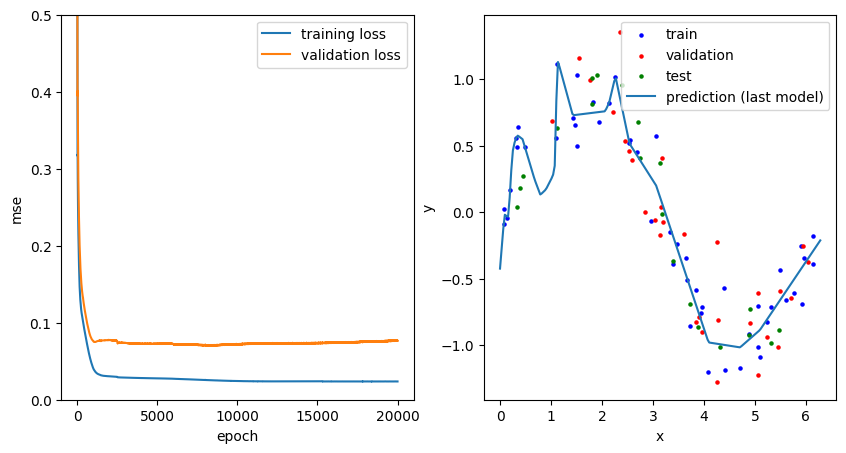

In [22]:
## Main
# Hyperparameters.
lr = 2e-4
epochs = 20000

# Instantiate our model.
model = FeedForwardNN(100)
# We use an optimizer so we do not have to take care of updating the parameters ourselves.
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
# PyTorch implements all kinds of loss functions you may want to use.
mse = torch.nn.MSELoss()
# We can print a model summary.
print(model)

# reporting the loss over time
losses_train = []
losses_val = []
best_val_loss = np.inf

# create dir to save the model
save_path = './model_checkpoints/e01/simple_nn/'
os.makedirs(save_path, exist_ok=True)

print('Training the neural network...')
t = time.time()
for epoch in range(epochs):
    # Compute the forward pass.
    y_predicted = model(x_train)
    # Compute the loss.
    loss = mse(y_train, y_predicted)
    # Reset and then compute gradients of the tree.
    optimizer.zero_grad()
    loss.backward()
    # Updating the parameters.
    optimizer.step()
    # Variables for plotting.
    losses_train.append(loss.detach().item())
    with torch.no_grad():
        losses_val.append(mse(model(x_val),y_val).item())
    # If we improve on our validation loss, we checkpoint the model as the new best model.
    if losses_val[-1] < best_val_loss:
        best_val_loss = losses_val[-1]
        torch.save(model,os.path.join(save_path,'best_model.pt'))
# after training is finished we also save our final model
torch.save(model,os.path.join(save_path,'final_model.pt'))
print(f'Training finished. Elapsed time: {time.time()-t:.02f} seconds.')

# plot losses and fit.
fig, [ax1,ax2] = plt.subplots(1,2, figsize=(10,5))
ax1.plot(losses_train, label="training loss")
ax1.plot(losses_val, label="validation loss")
ax1.set_ylabel('mse')
ax1.set_xlabel('epoch')
ax1.set_ylim([0,0.5])
ax1.legend()
ax2.scatter(x_train,y_train,c='b',s=5, label="train")
ax2.scatter(x_val,y_val,c='r',s=5, label='validation')
ax2.scatter(x_test,y_test,c='g',s=5, label='test')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
x_plot = torch.linspace(0.,2*torch.pi,200).unsqueeze(1)
y_plot = model(x_plot)
ax2.plot(x_plot.detach().numpy(), y_plot.detach().numpy(),label='prediction (last model)')
ax2.legend()

In [23]:
## Main
# We here compare the performance of the model after training and the model with the best
# validation loss on the test set.
best_model = torch.load(os.path.join(save_path,'best_model.pt'), weights_only=False)
test_score_final_model = mse(model(x_test),y_test).item()
test_score_best_model = mse(best_model(x_test),y_test).item()
print(f'Test loss: Final model: {test_score_final_model:.4f}; Best model: {test_score_best_model:.4f}')

Test loss: Final model: 0.0638; Best model: 0.0556


**Task 1: Explain the difference between train, validation, and test set and why their losses are different. Sort from smallest to largest.**

**Training Set:** Used to optimize model parameters by minimizing loss. Loss is lowest because the model fits this data directly.

**Validation Set:** Used to tune hyperparameters and check generalization. Loss is higher since it’s unseen data, not optimized.

**Test Set:** Evaluates final model performance on unseen data. Loss is highest as it’s not used in training or tuning.

**Why Different:** Training loss is minimized directly, validation loss reflects generalization, and test loss shows true performance on new data.

**Order (Smallest to Largest):** Training loss, Validation loss, Test loss.

**Task 2: Why does validation loss increase while training loss decreases? Can you increase this effect?**

**Why:** Training loss decreases as the model fits training data, but validation loss increases due to overfitting—model memorizes training data, not generalizing to validation set.

**Increase Effect:** Use a larger model (more neurons/layers), train longer, remove regularization (e.g., dropout), or reduce training data size.

In [24]:
# Increase hidden dimensions and epochs
class FeedForwardNN(nn.Module):
    def __init__(self, hidden_dim=200):  # Increased from 100 to 200
        super().__init__()
        self.input = nn.Linear(1, hidden_dim)
        self.hidden1 = nn.Linear(hidden_dim, hidden_dim)
        self.hidden2 = nn.Linear(hidden_dim, hidden_dim)  # Added extra layer
        self.output = nn.Linear(hidden_dim, 1)

    def forward(self, x):
        x = self.input(x)
        x = F.relu(x)
        x = self.hidden1(x)
        x = F.relu(x)
        x = self.hidden2(x)
        x = F.relu(x)
        out = self.output(x)
        return out

# Update hyperparameters
epochs = 30000  # Increased from 20000

**Task 3: What is the issue with the train-val-test split? Is there a better way?**

**Issue:** Random splitting doesn’t ensure even coverage of x-values (0 to 2π). Sets may miss parts of the sine function, leading to poor generalization.

**Better Way:** Sort data by x-values and split sequentially to ensure each set covers the full range. Example: Take first 50% for training, next 30% for validation, last 20% for testing.

In [ ]:
# Assuming imports: import torch, torch.nn as nn, torch.nn.functional as F, torch.optim

# Generate data (same as original)
x_data = torch.rand((100, 1), requires_grad=False) * 2 * torch.pi
y_data = torch.sin(x_data) + 0.2 * torch.randn_like(x_data)

# Sort data by x_data to ensure coverage
sorted_indices = torch.argsort(x_data.squeeze())
x_data_sorted = x_data[sorted_indices]
y_data_sorted = y_data[sorted_indices]

# Split into train (50%), validation (30%), test (20%)
n_train = 50
n_val = 30
n_test = 20
train_idxs = sorted_indices[:n_train]
val_idxs = sorted_indices[n_train:n_train + n_val]
test_idxs = sorted_indices[n_train + n_val:]

x_train = x_data[train_idxs]
y_train = y_data[train_idxs]
x_val = x_data[val_idxs]
y_val = y_data[val_idxs]
x_test = x_data[test_idxs]
y_test = y_data[test_idxs]

**Task 4: Training is slow. Run on GPU. Does it speed up? Why?**

**GPU Change:** Move model and data to GPU (e.g., model.to('cuda'), x_train.to('cuda')).

**Speeds Up?:** Yes, usually faster.

**Why:** GPUs parallelize matrix operations (e.g., neural network computations) across many cores, unlike CPUs. Optimized libraries (e.g., CUDA) boost performance, though small models may see modest gains due to data transfer overhead.

**Task 5: Add y = f(x) for the ‘best model’ with lowest validation loss to the plot**.

Load the best model (lowest validation loss). Compute predictions for x-values (0 to 2π). Plot as a curve, using a dashed line to distinguish from the final model’s curve, showing better fit to the sine function.

## Classification: MNIST
Classification in machine learning is a pivotal task where algorithms learn to assign predefined categories or labels to input data based on its features. It's a fundamental aspect of supervised learning, crucial for tasks like spam detection, sentiment analysis, medical diagnosis, and image recognition. Through training on labeled datasets, classification models discern patterns and relationships within the data, enabling them to accurately classify unseen instances. Techniques such as decision trees, support vector machines, and neural networks are commonly employed for classification tasks, each with its strengths and applicability depending on the nature of the data and the problem at hand. Effective classification algorithms not only automate decision-making processes but also enhance efficiency and accuracy across various fields by swiftly categorizing vast amounts of information.

MNIST, short for Modified National Institute of Standards and Technology database, is a widely used dataset in the field of machine learning and computer vision. It consists of 70,000 grayscale images of handwritten digits (0 through 9), each image being a 28x28 pixel grid. MNIST serves as a benchmark for evaluating algorithms in tasks such as digit recognition and classification. Its simplicity and availability have made it a standard dataset for researchers and practitioners to test and compare different machine learning models, particularly neural networks. MNIST has played a pivotal role in advancing the field of deep learning and remains an essential resource for developing and benchmarking image classification algorithms.

In [26]:
# Download and construct MNIST dataset.
train_dataset = torchvision.datasets.MNIST(root='./data/',
                                          train=True,
                                          transform=torchvision.transforms.ToTensor(),
                                          download=True)
test_dataset = torchvision.datasets.MNIST(root='./data/',
                                          train=False,
                                          transform=torchvision.transforms.ToTensor(),
                                          download=True)
# Dataset size:
print(f"Samples in train set: {len(train_dataset)}")
print(f"Samples in test set: {len(test_dataset)}")

# input/output size
image, label = train_dataset[0]
input_size = np.prod(image.size())
output_size = len(train_dataset.classes)

100%|██████████| 9.91M/9.91M [00:00<00:00, 18.2MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 487kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.57MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 7.50MB/s]

Samples in train set: 60000
Samples in test set: 10000


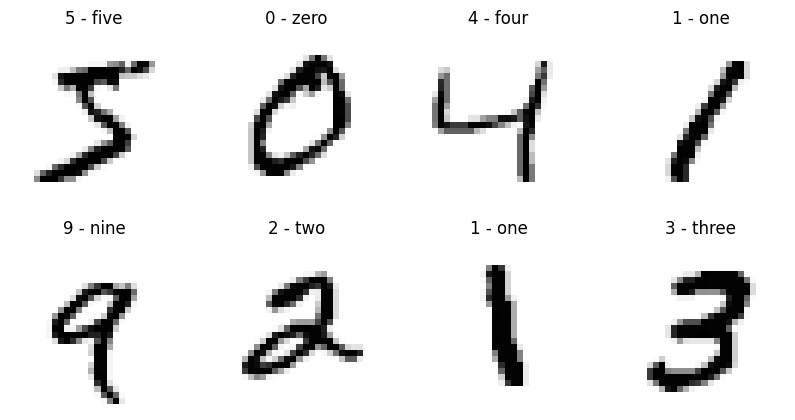

In [27]:
# Plot some of the images.
fig, axs = plt.subplots(2,4,figsize=(10,5))
for i, ax in enumerate(axs.flatten()):
    image, label = train_dataset[i]
    ax.imshow(np.einsum('ijk->jki',image),
              cmap='Greys' if image.shape[0] == 1 else None)
    ax.set_title(train_dataset.classes[label])
    ax.axis('off')

In [28]:
# Data loader (this provides queues and threads in a very simple way).
batch_size = 256
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True,
                                           num_workers=1,
                                           pin_memory=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=True,
                                          num_workers=1,
                                          pin_memory=True)


In [29]:
## Solution
# A simple feed-forward neural network for classification.
class FeedForwardModel(nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()
        self.input = nn.Linear(input_size, 1024)
        self.hidden1 = nn.Linear(1024, 1024)
        self.output = nn.Linear(1024, output_size)

    def forward(self, x):
        x = self.input(x)
        x = F.mish(x)
        x = self.hidden1(x)
        x = F.mish(x)
        x = self.output(x)
        return x

**Which Activation function to take**

**ReLU (Rectified Linear Unit):** Use for hidden layers in most deep neural networks (e.g., CNNs, MLPs). When: Simplifies training with fast convergence, avoids vanishing gradients for positive inputs. Best for general tasks like image classification. Caution: Can cause "dying neurons" (outputs stuck at 0) if inputs are mostly negative.

**Mish:** Use in hidden layers for tasks needing better generalization (e.g., complex image or NLP models). When: Slightly outperforms ReLU by allowing small negative gradients, improving smoothness and training stability. Choose when ReLU underperforms or for cutting-edge performance. Caution: Slower computation than ReLU.

**Tanh:** Use for tasks requiring bounded outputs (-1 to 1), like RNNs or shallow networks. When: Good for data with zero-centered inputs or when modeling opposing effects (e.g., LSTMs). Caution: Prone to vanishing gradients, slowing training in deep networks.

**ReLU** for speed and simplicity, **Mish** for advanced performance, **Tanh** for bounded or recurrent tasks.



In [30]:
# Parameters
device= 'cuda' if torch.cuda.is_available() else 'cpu'
lr = 3e-4
epochs = 10

# Instatiate model, loss, and optim.
model = FeedForwardModel(input_size,output_size).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
cat_cross = torch.nn.CrossEntropyLoss()

# For reporting the accuracy over epochs. Accuracy measures the percentage of classifications
# that are done correctly by the model. This is a typical metric to report for classification
# tasks. Note that the loss function is the categorical cross-entropy, not the accuracy.
accuracy_train = np.zeros(epochs)
accuracy_test = np.zeros(epochs)
def accuracy(y_true, y_pred):
    return ((y_pred.detach()==y_true.detach()).sum()/len(y_pred)*100.).item()


# Training loop.
t = time.time()
for epoch in range(epochs):
    for X,y in train_loader:
        X,y = X.to(device), y.to(device)
        y_pred = model(X.flatten(1))
        loss = cat_cross(y_pred,y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        accuracy_train[epoch]+=accuracy(y,y_pred.argmax(dim=1))
    # Report accuracy (note that train accuracy is recorded during the epoch, test is recoreded after an epoch).
    accuracy_train[epoch] /= np.ceil(len(train_dataset)/batch_size)
    with torch.no_grad():
          for X_test, y_test in test_loader:
                X_test,y_test = X_test.to(device), y_test.to(device)
                accuracy_test[epoch]+=accuracy(y_test,model(X_test.flatten(1)).argmax(dim=1))
    accuracy_test[epoch] /= np.ceil(len(test_dataset)/batch_size)
    print(f"Epoch {epoch} ({time.time()-t:.2f}s) - Loss = {loss.item():.5f}; Acc: train: {accuracy_train[epoch]:.2f}%, test: {accuracy_test[epoch]:.2f}%")
    t = time.time()

Epoch 0 (8.55s) - Loss = 0.21718; Acc: train: 87.96%, test: 93.22%
Epoch 1 (7.00s) - Loss = 0.08229; Acc: train: 94.17%, test: 95.17%
Epoch 2 (7.91s) - Loss = 0.09291; Acc: train: 95.71%, test: 95.99%
Epoch 3 (7.13s) - Loss = 0.12390; Acc: train: 96.68%, test: 96.98%
Epoch 4 (8.06s) - Loss = 0.09423; Acc: train: 97.27%, test: 96.78%
Epoch 5 (7.65s) - Loss = 0.10912; Acc: train: 97.70%, test: 97.25%
Epoch 6 (7.30s) - Loss = 0.01737; Acc: train: 98.08%, test: 97.54%
Epoch 7 (8.00s) - Loss = 0.05357; Acc: train: 98.41%, test: 97.69%
Epoch 8 (7.05s) - Loss = 0.03029; Acc: train: 98.58%, test: 97.73%
Epoch 9 (7.90s) - Loss = 0.03687; Acc: train: 98.79%, test: 97.76%


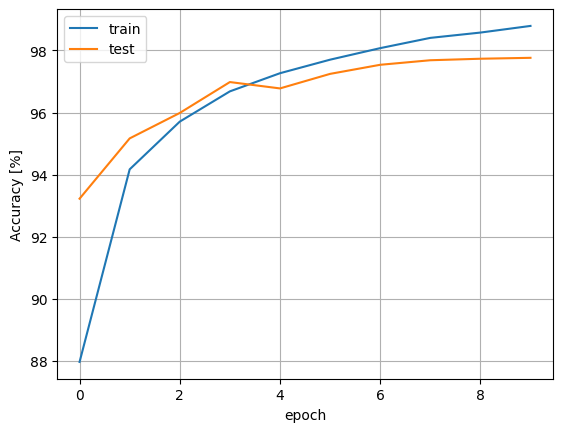

In [31]:
# plot accuracies over epochs
fig, ax = plt.subplots()
ax.plot(accuracy_train, label='train')
ax.plot(accuracy_test, label='test')
ax.set_xlabel('epoch')
ax.set_ylabel('Accuracy [%]')
ax.grid(True)
ax.legend()

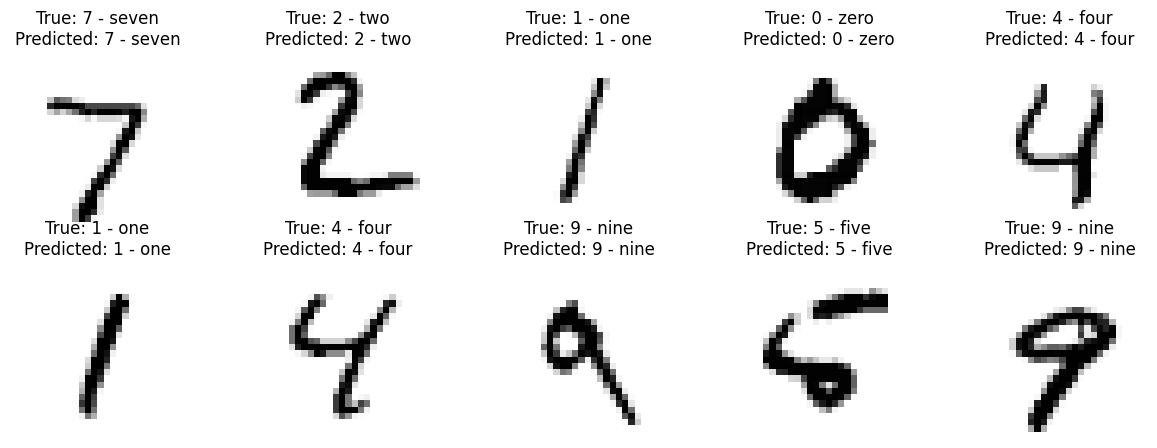

In [32]:
# Plot some of the images.
fig, axs = plt.subplots(2,5,figsize=(15,5))
for i, ax in enumerate(axs.flatten()):
    image, label_true = test_dataset[i]
    label_predicted = np.argmax(model(image.to(device).flatten()).cpu().data)
    ax.imshow(np.einsum('ijk->jki',image),
              cmap='Greys' if image.shape[0] == 1 else None)
    ax.set_title(f'True: {train_dataset.classes[label_true]}\nPredicted: {train_dataset.classes[label_predicted]}')
    ax.axis('off')


**Tasks:**
1. Performance is alright but not ideal. Try to get train accuracy up to 99% (Add linear layers/try out different activation functions (e.g., relu, mish, tanh,...)).
2. Try out computing on GPU instead of CPU. Is it always faster?
3. Play around with the CIFAR10 dataset (replace torchvision.datasets.MNIST with torchvision.datasets.CIFAR10). Can you get a high accuracy on this Dataset? Why?

In [33]:
## Solution
# A simple feed-forward neural network for classification.
class FeedForwardModel(nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()
        self.input = nn.Linear(input_size, 1024)
        self.hidden1 = nn.Linear(1024, 1024)
        self.hidden2 = nn.Linear(1024, 1024)
        self.output = nn.Linear(1024, output_size)

    def forward(self, x):
        x = self.input(x)
        x = F.relu(x)
        x = self.hidden1(x)
        x = F.relu(x)
        x = self.hidden2(x)
        x = F.relu(x)
        x = self.output(x)
        return x

In [34]:
# Parameters
device= 'cuda' if torch.cuda.is_available() else 'cpu'
lr = 3e-4
epochs = 10

# Instatiate model, loss, and optim.
model = FeedForwardModel(input_size,output_size).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
cat_cross = torch.nn.CrossEntropyLoss()

# For reporting the accuracy over epochs. Accuracy measures the percentage of classifications
# that are done correctly by the model. This is a typical metric to report for classification
# tasks. Note that the loss function is the categorical cross-entropy, not the accuracy.
accuracy_train = np.zeros(epochs)
accuracy_test = np.zeros(epochs)
def accuracy(y_true, y_pred):
    return ((y_pred.detach()==y_true.detach()).sum()/len(y_pred)*100.).item()


# Training loop.
t = time.time()
for epoch in range(epochs):
    for X,y in train_loader:
        X,y = X.to(device), y.to(device)
        y_pred = model(X.flatten(1))
        loss = cat_cross(y_pred,y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        accuracy_train[epoch]+=accuracy(y,y_pred.argmax(dim=1))
    # Report accuracy (note that train accuracy is recorded during the epoch, test is recoreded after an epoch).
    accuracy_train[epoch] /= np.ceil(len(train_dataset)/batch_size)
    with torch.no_grad():
          for X_test, y_test in test_loader:
                X_test,y_test = X_test.to(device), y_test.to(device)
                accuracy_test[epoch]+=accuracy(y_test,model(X_test.flatten(1)).argmax(dim=1))
    accuracy_test[epoch] /= np.ceil(len(test_dataset)/batch_size)
    print(f"Epoch {epoch} ({time.time()-t:.2f}s) - Loss = {loss.item():.5f}; Acc: train: {accuracy_train[epoch]:.2f}%, test: {accuracy_test[epoch]:.2f}%")
    t = time.time()

Epoch 0 (8.11s) - Loss = 0.09118; Acc: train: 89.35%, test: 94.44%
Epoch 1 (7.67s) - Loss = 0.15362; Acc: train: 96.05%, test: 96.48%
Epoch 2 (7.66s) - Loss = 0.08160; Acc: train: 97.48%, test: 97.33%
Epoch 3 (8.05s) - Loss = 0.06023; Acc: train: 98.25%, test: 97.55%
Epoch 4 (7.14s) - Loss = 0.06619; Acc: train: 98.76%, test: 97.72%
Epoch 5 (8.11s) - Loss = 0.03741; Acc: train: 98.99%, test: 97.82%
Epoch 6 (7.33s) - Loss = 0.03815; Acc: train: 99.24%, test: 97.75%
Epoch 7 (7.85s) - Loss = 0.12548; Acc: train: 99.44%, test: 97.84%
Epoch 8 (8.09s) - Loss = 0.00614; Acc: train: 99.56%, test: 98.12%
Epoch 9 (7.25s) - Loss = 0.03438; Acc: train: 99.72%, test: 98.15%


In [35]:

# Download and construct CIFAR10 dataset.
train_dataset = torchvision.datasets.CIFAR10(root='./data/',
                                          train=True,
                                          transform=torchvision.transforms.ToTensor(),
                                          download=True)
test_dataset = torchvision.datasets.CIFAR10(root='./data/',
                                          train=False,
                                          transform=torchvision.transforms.ToTensor(),
                                          download=True)
# Dataset size:
print(f"Samples in train set: {len(train_dataset)}")
print(f"Samples in test set: {len(test_dataset)}")

100%|██████████| 170M/170M [00:04<00:00, 42.4MB/s]


Samples in train set: 50000
Samples in test set: 10000


In [36]:
# input/output size

image, label = train_dataset[0]
input_size = np.prod(image.size())   #  computes the product of all elements in an iterable.
output_size = len(train_dataset.classes)

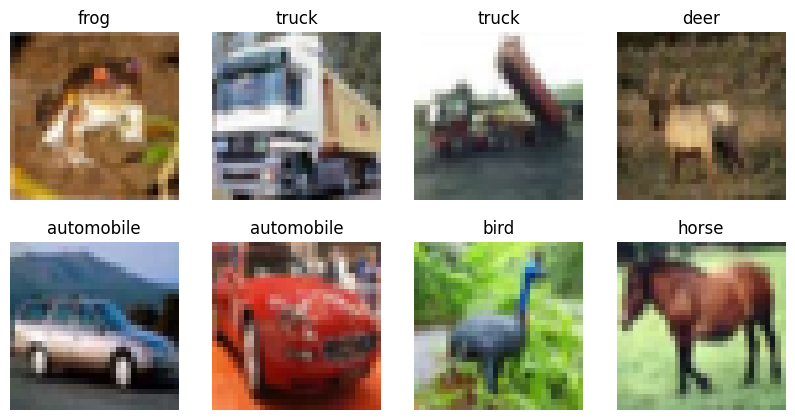

In [37]:
# plot some of the images.

fig, axs = plt.subplots(2, 4, figsize=(10,5))
for i, ax in enumerate(axs.flatten()):
    image, label = train_dataset[i]
    ax.imshow(np.einsum('ijk -> jki', image), cmap='Greys' if image.shape[0] == 1 else None)
    ax.set_title(train_dataset.classes[label])
    ax.axis('off')

In [38]:
# Data loader (ths provides queses and threads in a very simple way).

batch_size= 256
train_loader = torch.utils.data.DataLoader(dataset = train_dataset, batch_size = batch_size, shuffle = True, num_workers = 1, pin_memory= True)
test_loader = torch.utils.data.DataLoader(dataset = test_dataset, batch_size = batch_size, shuffle = True, num_workers = 1, pin_memory= True)

In [39]:
## Main
# A simple feed-forward neural network for classification.

class FeedForwardModel(nn.Module):
    def __init__(self, input_size, output_size): # Constructor method that initializes the model.
                                                 # Defines two fully connected layers (nn.Linear).

        super().__init__()                     # Calls the constructor of the parent class (nn.Module).
                                               # Ensures proper initialization of the PyTorch model.

        self.input = nn.Linear(input_size, 10)   # A fully connected layer that transforms input of input_size to 10 hidden neurons.
        self.output = nn.Linear(10, output_size)

    def forward (self, x):           # Defines the forward pass of the model.
                                     # Takes an input x, processes it through layers and activation function, and returns the output.

        x= self.input(x)            # Passes x through the first linear layer (nn.Linear).
        x = F.mish(x)               # Applies the Mish activation function (torch.nn.functional.mish).
        x= self.output(x)           # Passes the result through the second linear layer (nn.Linear).

        return x

In [40]:
# Parameters
device = 'cuda' if torch.cuda.is_available() else 'cpu'  # device = 'cuda'
lr = 3e-4
epochs = 10

# Instatiate model, loss, and optim.
model = FeedForwardModel(input_size, output_size).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = lr)
cross_ent = torch.nn.CrossEntropyLoss()


# For reporting the accuracy over epochs. Accuracy measures the percentage of classifications.
# that are done correctly by the model. This is a typical metric to report for classification tasks.
# Loss function is the categorical cross-entropy.

accuracy_train = np.zeros(epochs)
accuracy_test = np.zeros(epochs)
def accuracy(y_true, y_pred):
    return ((y_pred.detach() == y_true.detach()).sum()/len(y_pred)*100.).item()

# Training loop.
t = time.time()
for epoch in range(epochs):
    for X,y in train_loader:
        X,y = X.to(device), y.to(device)
        y_pred = model(X.flatten(1))
        loss = cross_ent(y_pred,y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        accuracy_train[epoch]+= accuracy(y,y_pred.argmax(dim= 1))

    # Report accuracy (note that train accuracy is recorded during the epoch, test is recorded after an epoch).
    accuracy_train[epoch] /= np.ceil(len(train_dataset)/batch_size)
    with torch.no_grad():
        for X_test, y_test in test_loader:
            X_test, y_test = X_test.to(device), y_test.to(device)
            accuracy_test[epoch] += accuracy(y_test, model(X_test.flatten(1)).argmax(dim=1))
    accuracy_test[epoch] /= np.ceil(len(test_dataset)/batch_size)
    print(f"Epoch {epoch} ({time.time()-t:.2f}s) - Loss = {loss.item():.5f}; Acc: train: {accuracy_train[epoch]:.2f}%, test: {accuracy_test[epoch]:.2f}%")
    t = time.time()

Epoch 0 (9.82s) - Loss = 1.99210; Acc: train: 22.17%, test: 28.15%
Epoch 1 (8.11s) - Loss = 1.92588; Acc: train: 31.50%, test: 33.44%
Epoch 2 (9.12s) - Loss = 1.66406; Acc: train: 34.92%, test: 35.65%
Epoch 3 (9.08s) - Loss = 1.81135; Acc: train: 36.62%, test: 38.08%
Epoch 4 (8.06s) - Loss = 1.67617; Acc: train: 37.61%, test: 37.74%
Epoch 5 (9.05s) - Loss = 1.73687; Acc: train: 38.10%, test: 38.43%
Epoch 6 (9.12s) - Loss = 1.61251; Acc: train: 38.38%, test: 37.54%
Epoch 7 (8.13s) - Loss = 1.92589; Acc: train: 39.15%, test: 39.14%
Epoch 8 (9.06s) - Loss = 1.80800; Acc: train: 39.36%, test: 39.18%
Epoch 9 (9.38s) - Loss = 1.65907; Acc: train: 39.83%, test: 39.77%


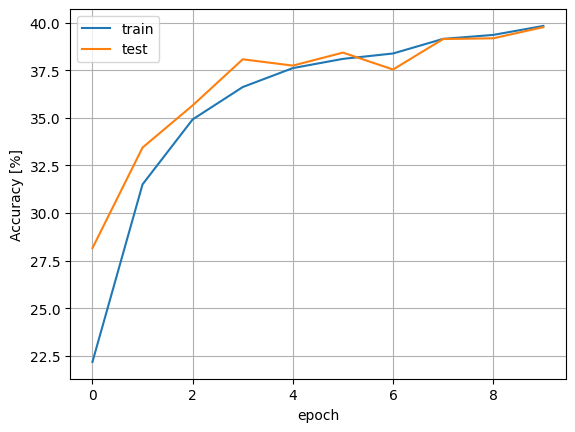

In [41]:
# Plot accuracies over epochs

fig, ax = plt.subplots()
ax.plot(accuracy_train, label = 'train')
ax.plot(accuracy_test, label='test')
ax.set_xlabel('epoch')
ax.set_ylabel('Accuracy [%]')
ax.grid(True)
ax.legend()

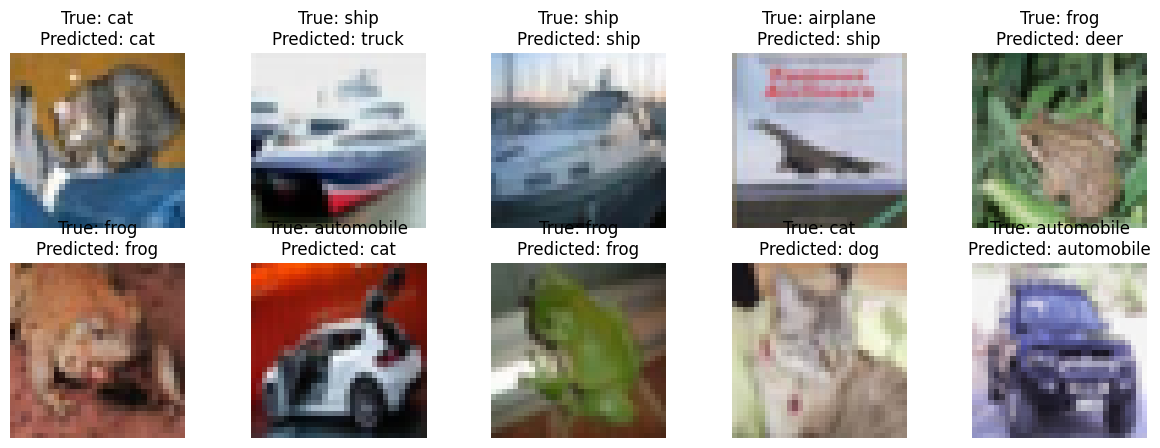

In [42]:
# plot some of the images.

fig,axs = plt.subplots(2,5,figsize=(15,5))
for i, ax in enumerate(axs.flatten()):
    image, label_true = test_dataset[i]
    label_predicted = np.argmax(model(image.to(device).flatten()).cpu().data)
    ax.imshow(np.einsum('ijk->jki',image),
              cmap='Greys' if image.shape[0] == 1 else None)
    ax.set_title(f'True: {train_dataset.classes[label_true]}\nPredicted: {train_dataset.classes[label_predicted]}')
    ax.axis('off')